In [1]:
#reading individual applicant data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/individual_application_information.csv').set_index('id')
df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,term_months
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,36.0
68355089,24700.0,24700.0,24700.0,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,36.0
68476807,10400.0,10400.0,10400.0,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,60.0
68426831,11950.0,11950.0,11950.0,13.44,405.18,C,C3,4.0,RENT,34000.0,...,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,36.0
68476668,20000.0,20000.0,20000.0,9.17,637.58,B,B2,10.0,MORTGAGE,180000.0,...,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,Cash,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,18000.0,18000.0,9.49,377.95,B,B2,5.0,OWN,130000.0,...,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0,Cash,60.0
88948836,29400.0,29400.0,29400.0,13.99,683.94,C,C3,9.0,MORTGAGE,180792.0,...,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0,Cash,60.0
89996426,32000.0,32000.0,32000.0,14.49,752.74,C,C4,3.0,MORTGAGE,157000.0,...,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,Cash,60.0


### About Loan Status

Fully Paid     1000086
Charged Off     251897
Name: loan_status, dtype: int64

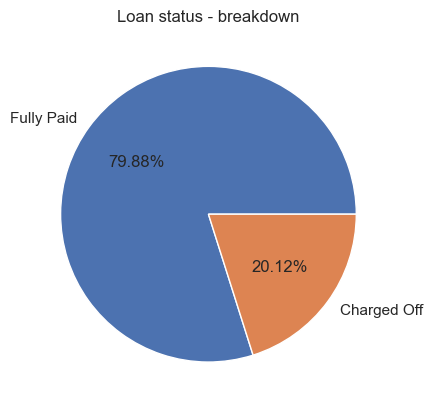

<Figure size 640x480 with 0 Axes>

In [2]:
count = df['loan_status'].value_counts()
display(count)

sns.set(style="darkgrid")
plt.pie(count, labels = count.index, autopct='%1.2f%%', startangle=0)
plt.title('Loan status - breakdown')
plt.show()
plt.savefig('figs/loan_status_breakdown.png')

### grade vs interest rate

,count
grade,
A,214982
B,364939
C,359485
D,187390
E,87186
F,29654
G,8347


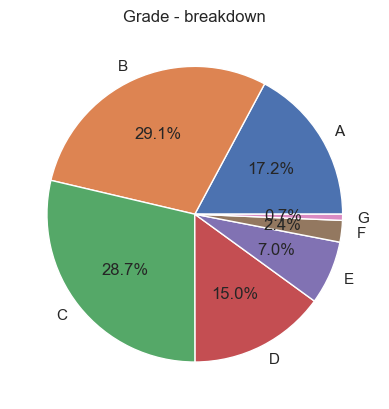

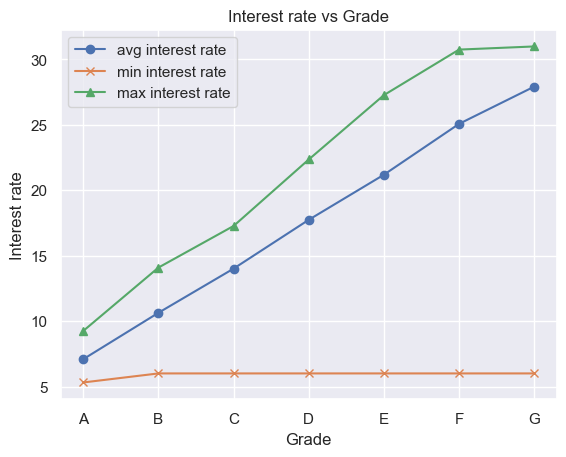

loan_status,Charged Off,Fully Paid
grade,,
A,12773,202209
B,48814,316125
C,81024,278461
D,57492,129898
E,33987,53199
F,13580,16074
G,4227,4120


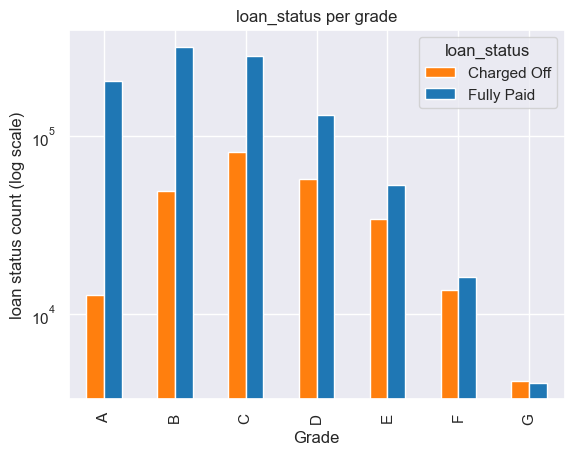

loan_status,Charged_off_percentage,fully_paid_percentage
grade,,
A,5.941428,94.058572
B,13.375934,86.624066
C,22.538910,77.461090
D,30.680399,69.319601
E,38.982176,61.017824
F,45.794834,54.205166
G,50.640949,49.359051


In [3]:
p = df[['grade','int_rate']].groupby('grade').count().rename({'int_rate':'count'}, axis=1)
display(p)
sns.set(style="darkgrid")
plt.pie(p['count'], labels = p.index, autopct='%1.1f%%', startangle=0)
plt.title('Grade - breakdown')
plt.savefig('figs/grade_breakdown.png')
plt.show()


del p

sns.set(style="darkgrid")
plt.plot(df[['grade','int_rate']].groupby('grade').mean()['int_rate'], marker = 'o', label = 'avg interest rate')
plt.plot(df[['grade','int_rate']].groupby('grade').min()['int_rate'], marker = 'x', label = 'min interest rate')
plt.plot(df[['grade','int_rate']].groupby('grade').max()['int_rate'], marker = '^', label = 'max interest rate')
plt.legend()
plt.xlabel('Grade')
plt.ylabel('Interest rate')
plt.title('Interest rate vs Grade')
plt.savefig('figs/int_vs_grade.png')
plt.show()


grade_counts = df.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)
display(grade_counts)

# Plot the results
sns.set(style="darkgrid")
grade_counts.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('loan_status per grade')
plt.xlabel('Grade')
plt.ylabel('loan status count (log scale)')
plt.legend(title='loan_status')
plt.yscale('log')
plt.savefig('figs/loan_status_per_grade.png')

plt.show()

#calculating percentages
grade_counts['Charged_off_percentage'] = grade_counts['Charged Off'] / (grade_counts['Charged Off']+grade_counts['Fully Paid'])* 100
grade_counts['fully_paid_percentage'] = grade_counts['Fully Paid'] / (grade_counts['Charged Off']+grade_counts['Fully Paid'])* 100

display(grade_counts[['Charged_off_percentage','fully_paid_percentage']])

del grade_counts

### purpose of loan

loan_status,Charged Off,Fully Paid
purpose,,
car,1874,10373
credit_card,47922,232603
debt_consolidation,155307,575126
educational,0,1
home_improvement,14543,66254
house,1434,4989
major_purchase,5039,20881
medical,3081,10991
moving,2001,6469


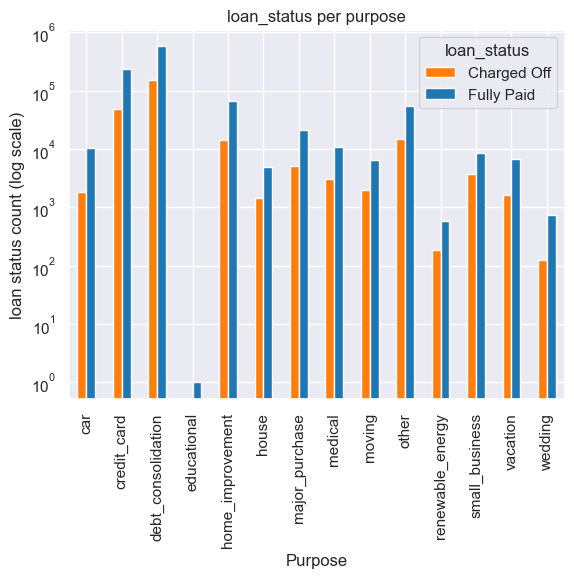

loan_status,Charged_off_percentage,fully_paid_percentage
purpose,,
car,15.301707,84.698293
credit_card,17.082969,82.917031
debt_consolidation,21.262320,78.737680
educational,0.000000,100.000000
home_improvement,17.999431,82.000569
house,22.326016,77.673984
major_purchase,19.440586,80.559414
medical,21.894542,78.105458
moving,23.624557,76.375443


In [4]:
purpose = df[['purpose','loan_status']].groupby('purpose').count().rename({'loan_status':'count'}, axis=1)
purpose['percentage'] = purpose['count'] / purpose['count'].sum() * 100
purpose

p = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
display(p)

# Plot the results
sns.set(style="darkgrid")
p.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('loan_status per purpose')
plt.xlabel('Purpose')
plt.ylabel('loan status count (log scale)')
plt.legend(title='loan_status')
plt.yscale('log')
plt.savefig('figs/loan_status_per_purpose.png')
plt.show()

#calculating percentages
p['Charged_off_percentage'] = p['Charged Off'] / (p['Charged Off']+p['Fully Paid'])* 100
p['fully_paid_percentage'] = p['Fully Paid'] / (p['Charged Off']+p['Fully Paid'])* 100

display(p[['Charged_off_percentage','fully_paid_percentage']])

del p

### Examining loan amount relation to loan_status

,loan_amnt
count,1251983.0
mean,14453.51442471663
std,8686.280847383947
min,1000.0
25%,8000.0
50%,12000.0
75%,20000.0
max,40000.0


,loan_amnt,loan_status,breakdown
id,,,
68407277,3600.0,Fully Paid,less than 14454$
68355089,24700.0,Fully Paid,more than 14454$
68476807,10400.0,Fully Paid,less than 14454$
68426831,11950.0,Fully Paid,less than 14454$
68476668,20000.0,Fully Paid,more than 14454$
...,...,...,...
89905081,18000.0,Fully Paid,more than 14454$
88948836,29400.0,Fully Paid,more than 14454$
89996426,32000.0,Charged Off,more than 14454$


loan_status,Charged Off,Fully Paid
breakdown,,
less than 14454$,127802,578784
more than 14454$,124095,421302


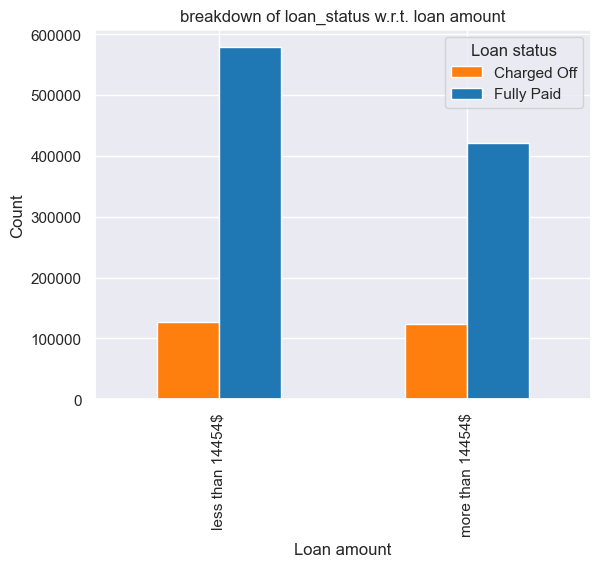

Loan charged off percentage when loan amount:


loan_status,fully_paid_percentage,charged_off_percentage
breakdown,,
less than 14454$,81.912747,18.087253
more than 14454$,77.246850,22.753150


In [5]:
target = 'loan_status'

loan_amnt_sum = df[['loan_amnt']].describe().astype('str')
display(loan_amnt_sum)

#creating a breakdown of loan amount, whether its less than mean or greater than mean
mean_amnt = round(float(loan_amnt_sum.loc['mean','loan_amnt']))

loan_amnt_breakdown = df[['loan_amnt',target]]

conditions = [
    (loan_amnt_breakdown['loan_amnt'] < mean_amnt),
    (loan_amnt_breakdown['loan_amnt'] >= mean_amnt)
     ]

#classes of breakdown
values = [f'less than {mean_amnt}$',
          f'more than {mean_amnt}$']

# Apply conditions using numpy.select
loan_amnt_breakdown['breakdown'] = np.select(conditions, values, default=np.nan)

display(loan_amnt_breakdown)

g1 = loan_amnt_breakdown.groupby(['breakdown', target]).size().unstack(fill_value=0)

display(g1)

# Plot the results
sns.set(style="darkgrid")
g1.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('breakdown of loan_status w.r.t. loan amount')
plt.xlabel('Loan amount')
plt.ylabel('Count')
plt.legend(title='Loan status')
plt.savefig('figs/loan_status_and_loan_amnt.png')
plt.show()

#calculating percentages
print('Loan charged off percentage when loan amount:')
g1['charged_off_percentage'] = g1['Charged Off'] / (g1['Charged Off'] + g1['Fully Paid'])* 100
g1['fully_paid_percentage'] = g1['Fully Paid'] / (g1['Charged Off'] + g1['Fully Paid'])* 100

display(g1[['fully_paid_percentage','charged_off_percentage']])

del g1
del loan_amnt_breakdown
del loan_amnt_sum

### Examining interest rates

,int_rate
count,1251983.0
mean,13.250672085803078
std,4.776293138945283
min,5.31
25%,9.75
50%,12.74
75%,16.01
max,30.99


,int_rate,loan_status,breakdown
id,,,
68407277,13.99,Fully Paid,more than 13
68355089,11.99,Fully Paid,less than 13
68476807,22.45,Fully Paid,more than 13
68426831,13.44,Fully Paid,more than 13
68476668,9.17,Fully Paid,less than 13
...,...,...,...
89905081,9.49,Fully Paid,less than 13
88948836,13.99,Fully Paid,more than 13
89996426,14.49,Charged Off,more than 13


loan_status,Charged Off,Fully Paid
breakdown,,
less than 13,80101,583735
more than 13,171796,416351


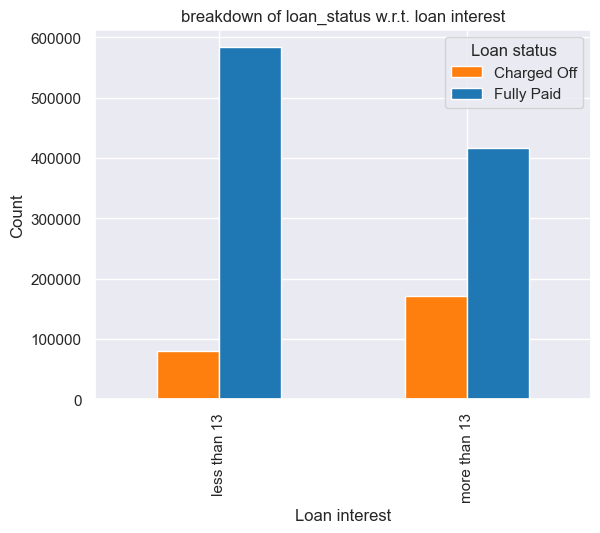

Loan charged off percentage when loan interest rate:


loan_status,fully_paid_percentage,charged_off_percentage
breakdown,,
less than 13,87.933616,12.066384
more than 13,70.790296,29.209704


In [6]:
int_sum = df[['int_rate']].describe().astype('str')
display(int_sum)


#creating a breakdown of interest rate, whether its less than mean or greater than mean
mean_int = round(float(int_sum.loc['mean','int_rate']))

int_breakdown = df[['int_rate',target]]

conditions = [
    (int_breakdown['int_rate'] < mean_int),
    (int_breakdown['int_rate'] >= mean_int)
     ]

#classes of breakdown
values = [f'less than {mean_int}',
          f'more than {mean_int}']

# Apply conditions using numpy.select
int_breakdown['breakdown'] = np.select(conditions, values, default=np.nan)

display(int_breakdown)

g2 = int_breakdown.groupby(['breakdown', target]).size().unstack(fill_value=0)

display(g2)

# Plot the results
sns.set(style="darkgrid")
g2.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('breakdown of loan_status w.r.t. loan interest')
plt.xlabel('Loan interest')
plt.ylabel('Count')
plt.legend(title='Loan status')
plt.savefig('figs/loan_status_and_interest.png')
plt.show()

#calculating percentages
print('Loan charged off percentage when loan interest rate:')
g2['charged_off_percentage'] = g2['Charged Off'] / (g2['Charged Off'] + g2['Fully Paid'])* 100
g2['fully_paid_percentage'] = g2['Fully Paid'] / (g2['Charged Off'] + g2['Fully Paid'])* 100

display(g2[['fully_paid_percentage','charged_off_percentage']])

del g2
del int_breakdown
del int_sum

### Examining employment length

loan_status,Charged Off,Fully Paid
emp_length,,
0.0,19689,75910
1.0,17173,64915
2.0,22725,90151
3.0,20227,79635
4.0,14789,58876
5.0,15378,61798
6.0,11324,46399
7.0,10920,44706
8.0,11540,45803


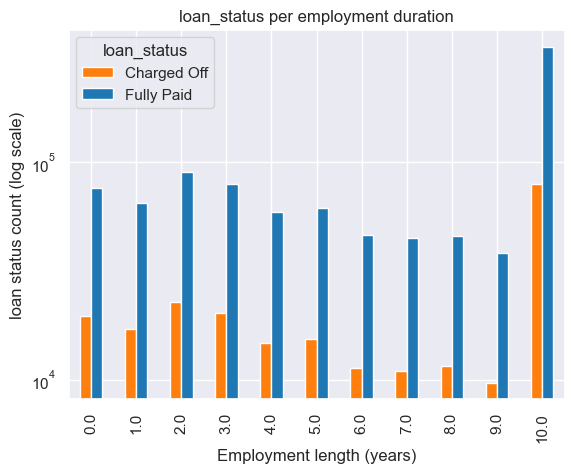

loan_status,Charged_off_percentage,fully_paid_percentage
emp_length,,
0.0,20.595404,79.404596
1.0,20.920232,79.079768
2.0,20.132712,79.867288
3.0,20.254952,79.745048
4.0,20.076020,79.923980
5.0,19.925884,80.074116
6.0,19.617830,80.382170
7.0,19.631108,80.368892
8.0,20.124514,79.875486


In [7]:
#calculating fully paid and charged off per employment length
emp_len_count = df.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)
display(emp_len_count)

# Plot the results
sns.set(style="darkgrid")
emp_len_count.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('loan_status per employment duration')
plt.xlabel('Employment length (years)')
plt.ylabel('loan status count (log scale)')
plt.legend(title='loan_status')
plt.yscale('log')
plt.savefig('figs/loan_status_per_emp_length.png')
plt.show()

#calculating percentages
emp_len_count['Charged_off_percentage'] = emp_len_count['Charged Off'] / (emp_len_count['Charged Off']+emp_len_count['Fully Paid'])* 100
emp_len_count['fully_paid_percentage'] = emp_len_count['Fully Paid'] / (emp_len_count['Charged Off']+emp_len_count['Fully Paid'])* 100

display(emp_len_count[['Charged_off_percentage','fully_paid_percentage']])


del emp_len_count

### Examining number of mortgage accounts

,mort_acc,loan_status,breakdown
id,,,
68407277,1.0,Fully Paid,less than 2
68355089,4.0,Fully Paid,more than 2
68476807,6.0,Fully Paid,more than 2
68426831,0.0,Fully Paid,less than 2
68476668,4.0,Fully Paid,more than 2
...,...,...,...
89905081,3.0,Fully Paid,more than 2
88948836,3.0,Fully Paid,more than 2
89996426,3.0,Charged Off,more than 2


loan_status,Charged Off,Fully Paid
breakdown,,
less than 2,163563,560164
more than 2,88334,439922


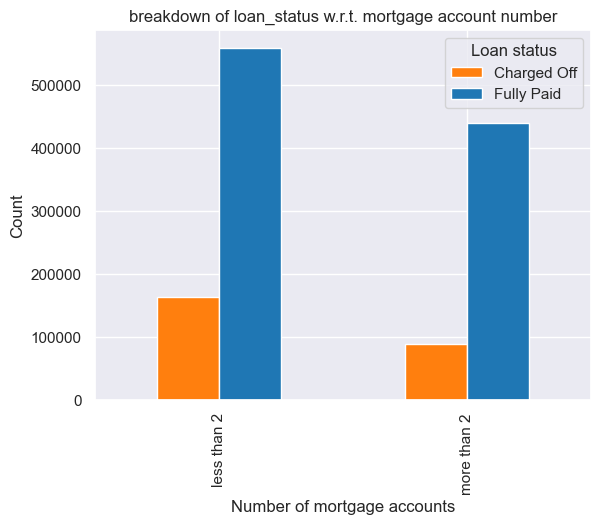

Loan charged off percentage when loan interest rate:


loan_status,fully_paid_percentage,charged_off_percentage
breakdown,,
less than 2,77.399904,22.600096
more than 2,83.278183,16.721817


In [8]:
#creating a breakdown of mortgage account number, whether its less than 2 or greater than 2
threshold = 2

mort_breakdown = df[['mort_acc',target]]

conditions = [
    (mort_breakdown['mort_acc'] < threshold),
    (mort_breakdown['mort_acc'] >= threshold)
     ]

#classes of breakdown
values = [f'less than {threshold}',
          f'more than {threshold}']

# Apply conditions using numpy.select
mort_breakdown['breakdown'] = np.select(conditions, values, default=np.nan)

display(mort_breakdown)

g3 = mort_breakdown.groupby(['breakdown', target]).size().unstack(fill_value=0)

display(g3)

# Plot the results
sns.set(style="darkgrid")
g3.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('breakdown of loan_status w.r.t. mortgage account number')
plt.xlabel('Number of mortgage accounts')
plt.ylabel('Count')
plt.legend(title='Loan status')
plt.savefig('figs/loan_status_and_mortgage_acc.png')
plt.show()

#calculating percentages
print('Loan charged off percentage when loan interest rate:')
g3['charged_off_percentage'] = g3['Charged Off'] / (g3['Charged Off'] + g3['Fully Paid']) * 100
g3['fully_paid_percentage'] = g3['Fully Paid'] / (g3['Charged Off'] + g3['Fully Paid'])* 100

display(g3[['fully_paid_percentage','charged_off_percentage']])

del g3
del mort_breakdown

,annual_inc
count,1251983.0
mean,77032.44717001746
std,70999.48941629838
min,2000.0
25%,46592.0
50%,65000.0
75%,92000.0
max,10999200.0


,annual_inc,loan_status,breakdown
id,,,
68407277,55000.0,Fully Paid,less than 77032$
68355089,65000.0,Fully Paid,less than 77032$
68476807,104433.0,Fully Paid,more than 77032$
68426831,34000.0,Fully Paid,less than 77032$
68476668,180000.0,Fully Paid,more than 77032$
...,...,...,...
89905081,130000.0,Fully Paid,more than 77032$
88948836,180792.0,Fully Paid,more than 77032$
89996426,157000.0,Charged Off,more than 77032$


loan_status,Charged Off,Fully Paid
breakdown,,
less than 77032$,172534,616767
more than 77032$,79363,383319


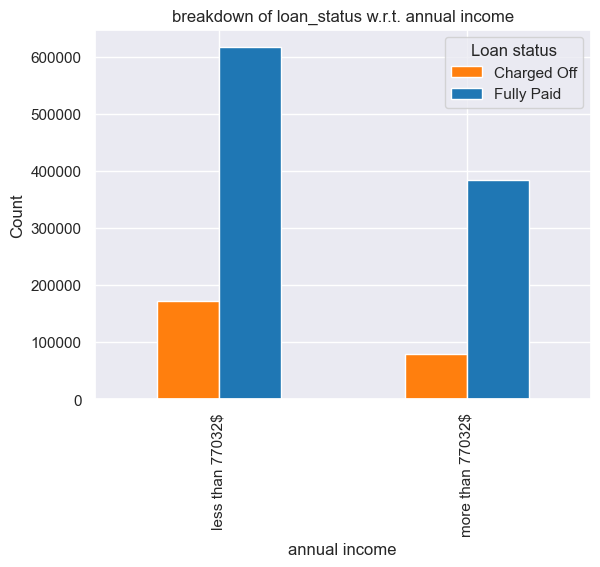

Loan charged off percentage when annual income:


loan_status,fully_paid_percentage,charged_off_percentage
breakdown,,
less than 77032$,78.140912,21.859088
more than 77032$,82.847182,17.152818


In [9]:
inc_sum = df[['annual_inc']].describe().astype('str')
display(inc_sum)


#creating a breakdown of interest rate, whether its less than mean or greater than mean
mean_inc = round(float(inc_sum.loc['mean','annual_inc']))

inc_breakdown = df[['annual_inc',target]]

conditions = [
    (inc_breakdown['annual_inc'] < mean_inc),
    (inc_breakdown['annual_inc'] >= mean_inc)
     ]

#classes of breakdown
values = [f'less than {mean_inc}$',
          f'more than {mean_inc}$']

# Apply conditions using numpy.select
inc_breakdown['breakdown'] = np.select(conditions, values, default=np.nan)

display(inc_breakdown)

g4 = inc_breakdown.groupby(['breakdown', target]).size().unstack(fill_value=0)

display(g4)

# Plot the results
sns.set(style="darkgrid")
g4.plot(kind='bar', color=['#ff7f0e','#1f77b4'])
plt.title('breakdown of loan_status w.r.t. annual income')
plt.xlabel('annual income')
plt.ylabel('Count')
plt.legend(title='Loan status')
plt.savefig('figs/loan_status_and_income.png')
plt.show()

#calculating percentages
print('Loan charged off percentage when annual income:')
g4['charged_off_percentage'] = g4['Charged Off'] / (g4['Charged Off'] + g4['Fully Paid'])* 100
g4['fully_paid_percentage'] = g4['Fully Paid'] / (g4['Charged Off'] + g4['Fully Paid'])* 100

display(g4[['fully_paid_percentage','charged_off_percentage']])

del g4
del inc_breakdown
del inc_sum